In [ ]:
import numpy as np
# 산술평균
data = [10, 20, 30, 40, 50]
mean_value = np.mean(data)
print(mean_value)  # 30.0

30.0


In [3]:
# 기하평균
from scipy.stats import hmean, gmean
gmean(data)

np.float64(26.051710846973528)

In [4]:
#조화평균
hmean(data)

np.float64(21.8978102189781)

In [5]:
#가중평균
# 가격과 개수
prices = [5000, 9000]
counts = [8, 2]

np.average(prices, weights=counts)

np.float64(5800.0)

# 대표값 - 중앙값

In [6]:
data

[10, 20, 30, 40, 50]

# 백분위수

In [10]:
import numpy as np

#scores = [65, 75, 80, 85, 95]
scores = [15, 75, 80, 85, 95]
p25 = np.percentile(scores, 25) #Q1
p50 = np.percentile(scores, 50) #Q2. median
p75 = np.percentile(scores, 75) #Q3

p25, p50, p75


(np.float64(75.0), np.float64(80.0), np.float64(85.0))

In [9]:
# IQR : 사분위범위 Q3-Q1 = 85-75 = 10

p75-p25

np.float64(10.0)

In [ ]:
중앙값, 분위수는 개수(위치)를 중요시하는 통계량
이상값/극단적인 값이 중요하지 않다.

# 대표값 - 최빈값 (가장 자주 발생하는 값)

# 범위의 계산 > 변동성을 측정하는 지표 > 극단적인 값에 민감

- 최대/최소 2개의 값만 사용
- 개별점수들이 다른 점수들과 얼마나 차이가 있는지 범위가 아니라
- 실제 데이터가 어떤 값들로 구성되어 있는지를 설명할 수 없다.


In [11]:
data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  

40


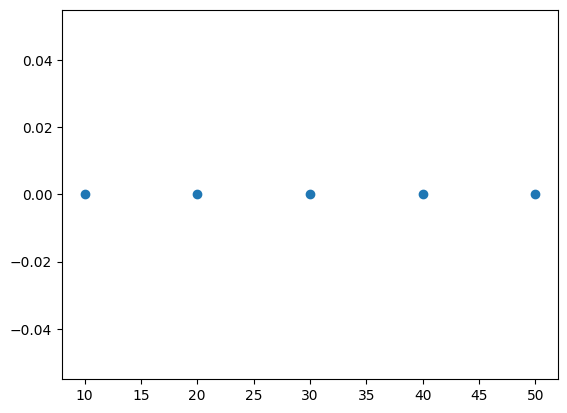

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data, np.zeros_like(data))

In [15]:
import seaborn as sns
vp_df = sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# sepal_length의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

np.float64(3.6000000000000005)

In [20]:
#모든 속성의 범위
#반복문
numeric_cols = vp_df.select_dtypes(include='number').columns
for col in numeric_cols:
    col_min = vp_df[col].min()
    col_max = vp_df[col].max()
    col_rag = col_max - col_min
    print(col_min)

4.3
2.0
1.0
0.1


변동성이 가장 큰 속성은 petal_length이다.
	petal_length와 petal_width 가 sepal_length와 sepal_width보다 상대적으로 변동성이 크다

    모델 생성시에 다루어야하는 속성으로 볼 수 있다.

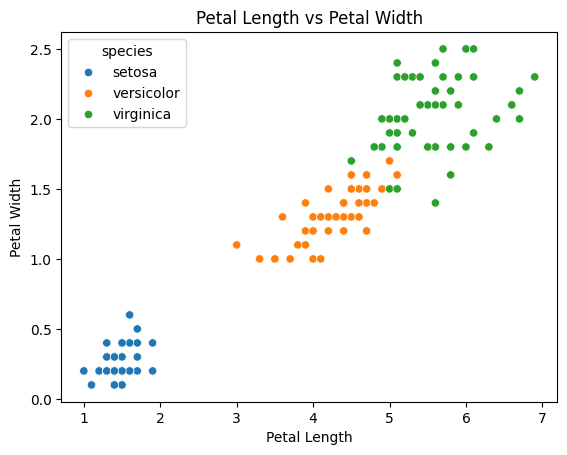

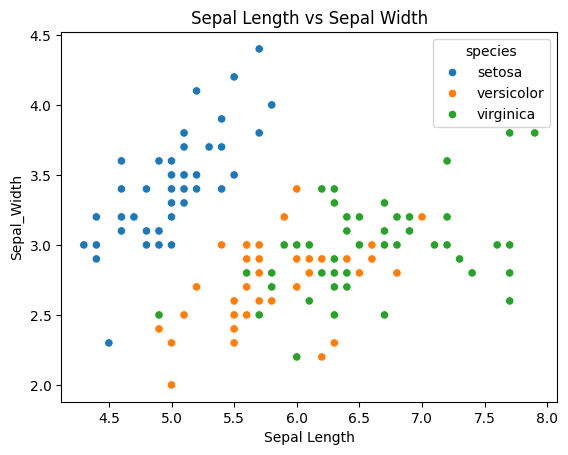

In [22]:
#산포도로 변동성 확인하기
#petal_length와 petal_width

plt.figure()
sns.scatterplot(
    data=vp_df,
    x='petal_length',
    y='petal_width',
    hue='species'
)

plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

#sepal_length와 sepal_width
plt.figure()
sns.scatterplot(
    data=vp_df,
    x='sepal_length',
    y='sepal_width',
    hue='species'
)

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal_Width')
plt.show()


산포도를 이용해 극단적으로 다른 데이터(이상치)가 있는지를 확인해야 한다.

# 분산
분산값이 크면 데이터가 평균값 주변에서 많이 흩어져 있다는 의미

In [23]:
import numpy as np

data = [10, 20, 30, 40, 50]
variance_value = np.var(data)
print(variance_value)  # 200.0

200.0


In [24]:
import numpy as np

std_dev = np.std(data)
print(std_dev)  # 14.14

14.142135623730951


# 표준편차의 비교

In [44]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100
sd1 = 10
sd2 = 50

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)



In [45]:
bins = np.arange(0,240,10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230])

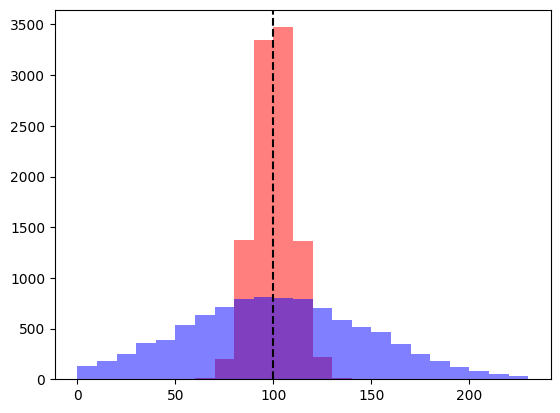

In [46]:
plt.hist(data1, bins=bins, alpha=0.5, color='red')
plt.hist(data2, bins=bins, alpha=0.5, color='blue')

#평균선 표시
plt.axvline(mu, color='black', linestyle='--')

In [25]:
vp_df = sns.load_dataset('iris')

numeric_cols = vp_df.select_dtypes(include='number').columns

for col in numeric_cols:
    std_val = vp_df[col].std()
    print(f"{col}:std = {std_val:.4f}")

sepal_length:std = 0.8281
sepal_width:std = 0.4359
petal_length:std = 1.7653
petal_width:std = 0.7622


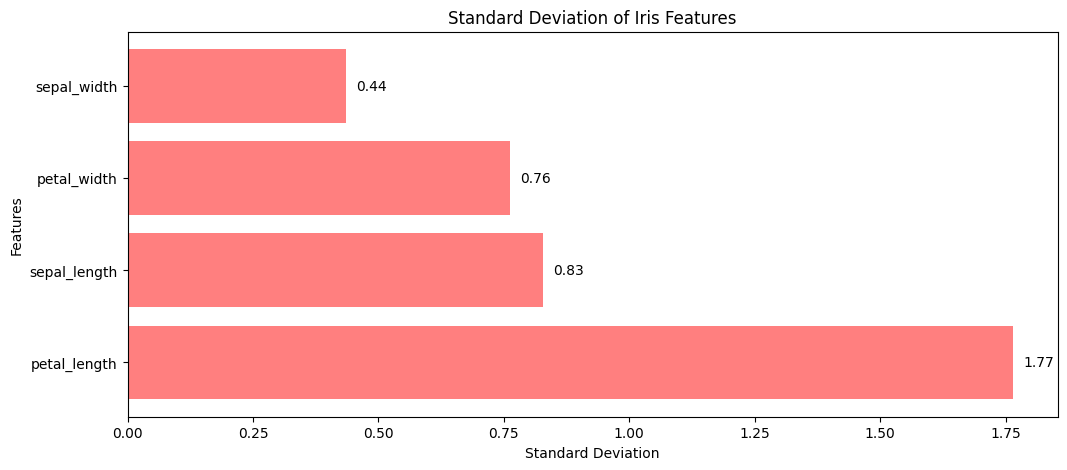

In [ ]:

std_dict = {col: vp_df[col].std() for col in numeric_cols}


sorted_std = dict(sorted(std_dict.items(), key=lambda item: item[1], reverse=True))

# 시각화 (y축: 속성, x축: 표준편차 값)
plt.figure(figsize=(12,5))
plt.barh(
    y=list(sorted_std.keys()), 
    width=list(sorted_std.values()),
    color = 'red', alpha = 0.5
)

plt.xlabel('Standard Deviation')
plt.ylabel('Features')
plt.title('Standard Deviation of Iris Features')

# x축에 값 표시
for index, value in enumerate(sorted_std.values()):
    plt.text(value + 0.02, index, f"{value:.2f}", va='center')

plt.show()


# 사분위범위

In [49]:
import pandas as pd

numeric_df = vp_df.select_dtypes(include=['float64', 'int'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3-Q1

summ = pd.DataFrame({'Q1': Q1,
              'Q3': Q3,
              'IQR': IQR,})
summ

,Q1,Q3,IQR
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


가장 분산이 큰 변수 : petal_length
가장 분산이 작은 변수: sepal_width
품종을 분류할 때, petal_length가 가장 민감하게 작동
식별력이 큼

** IQR 값이 클수록 이상치의 허용범위가 큼


# 분포의 형태
- 모양이 정규분포인지
- 치우쳐져 있는가 (좌/우, 위/아래)
- 특이한 패턴이 있는가 (쌍봉우리)

In [50]:
import pandas as pd
import numpy as np

# 데이터 입력
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

# DataFrame으로 변환
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


- 각 변수의 분표 형태 : 5개의 변수
- 값의 범위, 도수가 많은 구간 (count) 빈도
- 이상치 유무

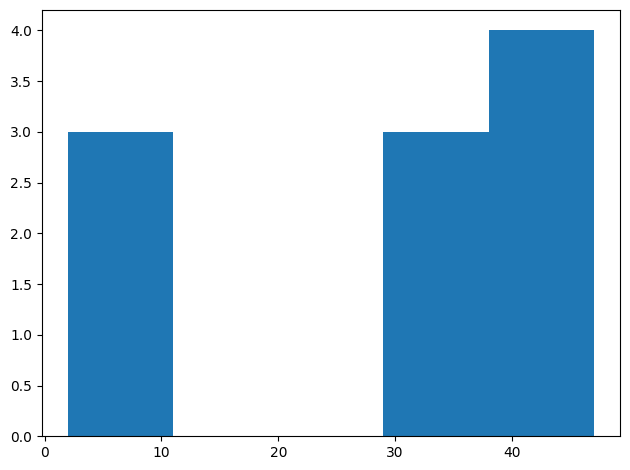

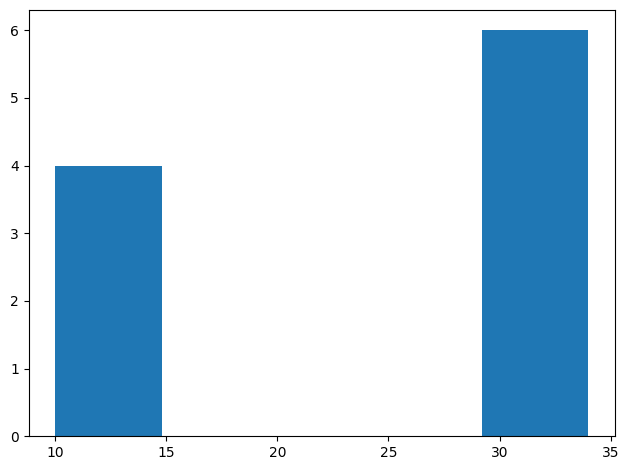

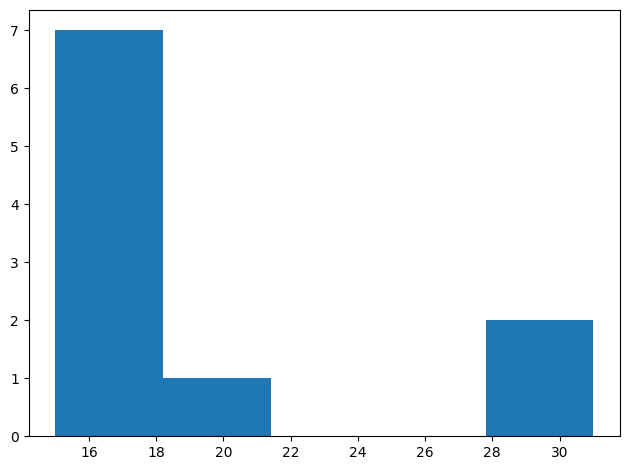

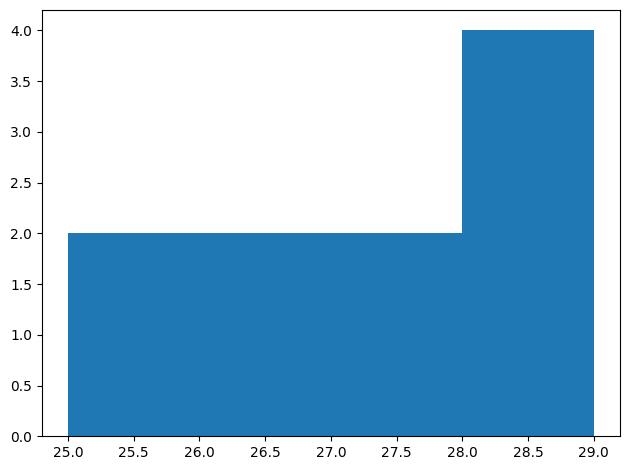

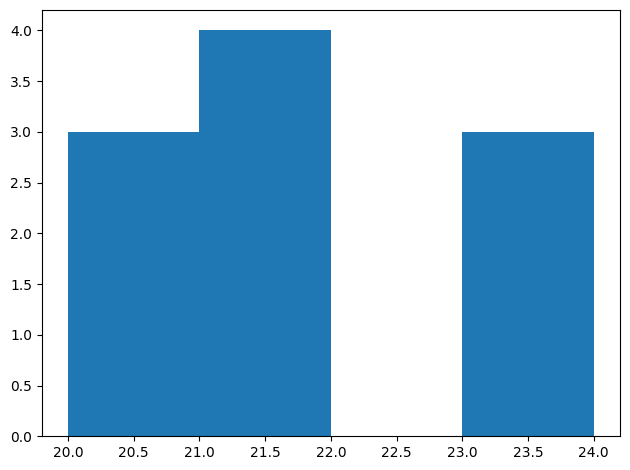

In [54]:
for col in df.columns:
    plt.hist(df[col], bins='sturges')
    plt.tight_layout()
    plt.show()

In [55]:
from scipy.stats import kurtosis

kurtosis_value = kurtosis(data)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


In [57]:
#iris data로 첨도의 계산
vp_df = sns.load_dataset('iris')

numeric_cols = vp_df.select_dtypes(include='number').columns

kurtosis_values = vp_df[numeric_cols].kurt()
print(kurtosis_values)

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64


0: 정규분포
양수 첨도: 정규분포보다 그만큼 뾰족하다 > 꼬리가 두껍다
(길다)
음수 첨도: 정규분포보다 그만큼 눌려있다 > 꼬리가 얇다
(짧다) : 데이터가 평균 주변에 고르다

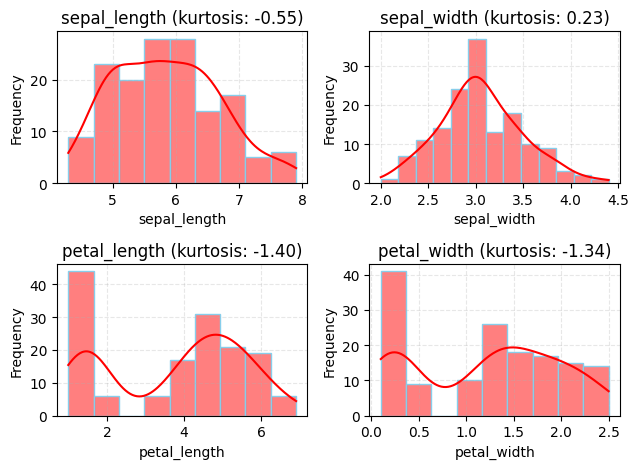

In [61]:
vp_df = sns.load_dataset('iris')

numeric_cols = vp_df.select_dtypes(include='number').columns

kurtosis_values = vp_df[numeric_cols].kurt()

plt.figure()

for idx, col in enumerate(numeric_cols):
    plt.subplot(2, 2, idx+1)
    sns.histplot(vp_df[col], kde=True, color='red', edgecolor='skyblue')
    
    kurt = kurtosis_values[col]
    plt.title(f"{col} (kurtosis: {kurt:.2f})")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.3)
    
plt.tight_layout()
plt.show()

양의 첨도 > 3, 정규분포보다 뾰족하고 꼬리가 두꺼워서 극단적인 값이 더 많다.
음의 첨도 < 3, 정규분포보다 평평하고 꼬리가 얇아서 극단적인 값이 덜 발생한다.

In [ ]:
from scipy.stats import skew

data = [10, 20, 30, 40, 100]  # 오른쪽으로 치우친 데이터
skew_value = skew(data)
print(skew_value)  # 양수 (오른쪽 꼬리) *꼬리 기준

1.1384199576606167
